In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem definition
I have a rod that is heated at two sides (100 degrees on one end and 200 degress on another). The temperature of the rod is 0 degrees at time 0. Simulate the heat propagation.

In [2]:
rod_length = 1.0
k = 0.51
temp_left = 100
temp_right = 200
simulation_time = 15
dx = 1e-2
dt = 1e-5
x = np.linspace(0,rod_length, int(rod_length/dx)+1)
t =  np.linspace(0,simulation_time, int(simulation_time/dt)+1)

In [3]:
u = np.zeros([t.shape[0], x.shape[0]])
u[:,0] = temp_left
u[:,-1] = temp_right

In [4]:
for _t in range(1, t.shape[0] - 1):
    for _x in range(1, x.shape[0] - 1):
        u[_t+1, _x] = k*(dt/dx**2)*(u[_t, _x+1]-2*u[_t,_x] + u[_t,_x-1]) + u[_t,_x]

In [5]:
# vectorized

uu = np.zeros([t.shape[0], x.shape[0]])
uu[:,0] = temp_left
uu[:,-1] = temp_right

const_val = k*(dt/dx**2)

for _t in range(1, t.shape[0] - 1):
    uu[_t+1,1:-1] = const_val*(uu[_t, 2:]-2*uu[_t,1:-1] + uu[_t,0:-2]) + uu[_t,1:-1]


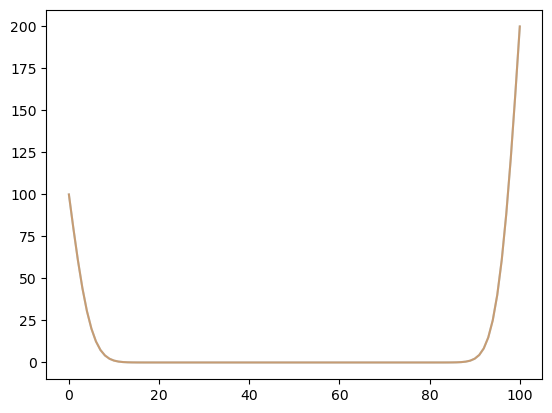

In [6]:
timestep = 150
plt.plot(u[timestep], alpha=.5, label='iterative')
plt.plot(uu[timestep], alpha=.5, label='vectorized')
plt.show()